<a href="https://colab.research.google.com/github/suvam23/Assignment-of-AI/blob/main/2462248_Suvam_Pant__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, chi2


In [5]:
# load dataset
df = pd.read_csv("/content/drive/MyDrive/AI/AB_NYC_2019.csv")

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

df.info()
df.describe()


Shape: (48895, 16)

Columns:
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df.isnull().sum()


,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [8]:
# remove rows with many missing values
df = df.dropna()

# example classification target:
# We convert price into cheap/expensive class
df['price_class'] = np.where(df['price'] > df['price'].median(), 1, 0)


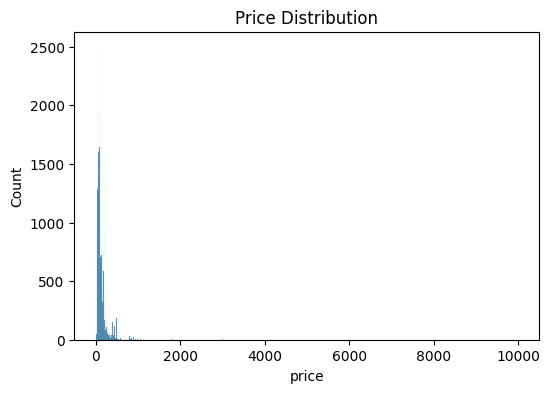

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df['price'])
plt.title("Price Distribution")
plt.show()


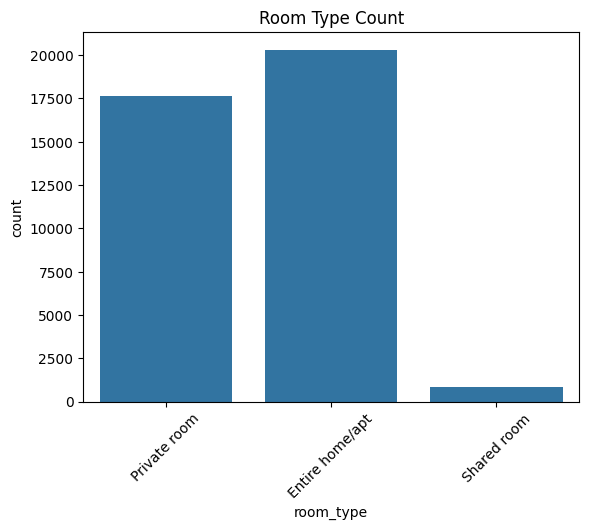

In [10]:
sns.countplot(x='room_type', data=df)
plt.xticks(rotation=45)
plt.title("Room Type Count")
plt.show()

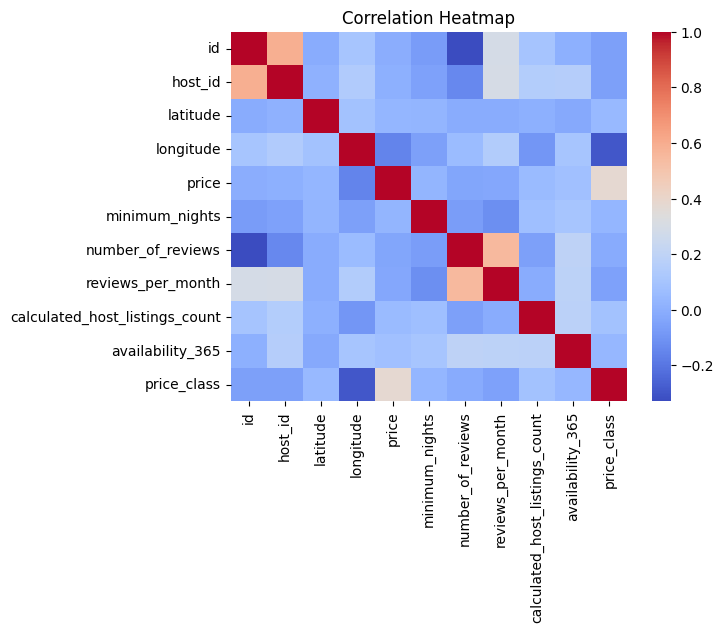

In [11]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [13]:
features = ['minimum_nights','number_of_reviews','reviews_per_month','availability_365']

X = df[features]
y = df['price_class']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
#  MLP classifier
nn = MLPClassifier(hidden_layer_sizes=(32,16), max_iter=300)

nn.fit(X_train, y_train)

pred_nn = nn.predict(X_test)

print("Neural Network Accuracy:", accuracy_score(y_test, pred_nn))


Neural Network Accuracy: 0.5813264649066323


In [15]:
lr = LogisticRegression(max_iter=500)

lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

print("Logistic Accuracy:", accuracy_score(y_test, pred_lr))


Logistic Accuracy: 0.5162910495814552


In [16]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, pred_dt))


Decision Tree Accuracy: 0.541017385705087


In [17]:
lr_params = {
    'C':[0.01,0.1,1,10]
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=500),
                       lr_params,
                       cv=5)

grid_lr.fit(X_train, y_train)

print("Best Logistic Params:", grid_lr.best_params_)
print("Best Logistic CV Score:", grid_lr.best_score_)


Best Logistic Params: {'C': 0.01}
Best Logistic CV Score: 0.519674039671426


In [18]:
dt_params = {
    'max_depth':[3,5,10,None],
    'min_samples_split':[2,5,10]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(),
                       dt_params,
                       cv=5)

grid_dt.fit(X_train, y_train)

print("Best DT Params:", grid_dt.best_params_)
print("Best DT CV Score:", grid_dt.best_score_)


Best DT Params: {'max_depth': 10, 'min_samples_split': 5}
Best DT CV Score: 0.5823030624166272


In [19]:
best_lr = grid_lr.best_estimator_
best_dt = grid_dt.best_estimator_


In [20]:
selector = SelectKBest(chi2, k=3)

X_new = selector.fit_transform(abs(X_train), y_train)

selected_features = np.array(features)[selector.get_support()]

print("Selected Features:", selected_features)


Selected Features: ['minimum_nights' 'number_of_reviews' 'reviews_per_month']


In [30]:
classification_table = pd.DataFrame({
    'Model': [
        'Neural Network',
        'Logistic Regression',
        'Decision Tree'

    ],
    'Features': [
        f'Selected ({len(selected_features)})',
        f'Selected ({len(selected_features)})',
        f'Selected ({len(selected_features)})'
    ],
    'CV Score': [
        'N/A',                   # Logistic Regression not tuned with CV
        grid_dt.best_score_,     # Decision Tree CV score
        'N/A'                    # Neural Network not tuned with CV
    ],
    'Accuracy': [
        accuracy_score(y_test, best_lr.predict(X_test)),
        accuracy_score(y_test, best_dt.predict(X_test)),
        accuracy_score(y_test, nn.predict(X_test))
    ],
    'Precision': [
        precision_score(y_test, best_lr.predict(X_test)),
        precision_score(y_test, best_dt.predict(X_test)),
        precision_score(y_test, nn.predict(X_test))
    ],
    'Recall': [
        recall_score(y_test, best_lr.predict(X_test)),
        recall_score(y_test, best_dt.predict(X_test)),
        recall_score(y_test, nn.predict(X_test))
    ],
    'F1-Score': [
        f1_score(y_test, best_lr.predict(X_test)),
        f1_score(y_test, best_dt.predict(X_test)),
        f1_score(y_test, nn.predict(X_test))
    ]
})

classification_table


,Model,Features,CV Score,Accuracy,Precision,Recall,F1-Score
0,Neural Network,Selected (3),N/A,0.516420,0.529184,0.383831,0.444937
1,Logistic Regression,Selected (3),0.582303,0.580940,0.582570,0.600102,0.591206
2,Decision Tree,Selected (3),N/A,0.581326,0.569158,0.703137,0.629093
